In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as sc #scientific python
import statsmodels.api as sm

from scipy.stats import pearsonr
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv('delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery Time,21.0,16.790952,5.074901,8.0,13.5,17.83,19.75,29.0
Sorting Time,21.0,6.190476,2.542028,2.0,4.0,6.00,8.00,10.0


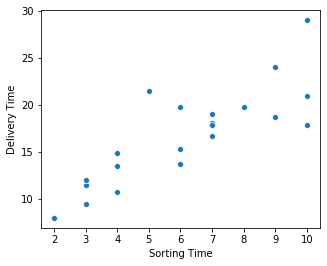

In [5]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='Sorting Time', y='Delivery Time')
plt.show()

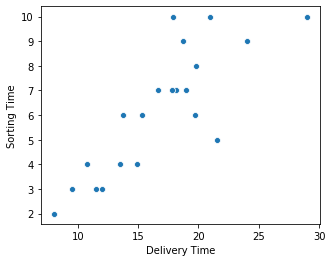

In [6]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x='Delivery Time', y='Sorting Time')
plt.show()

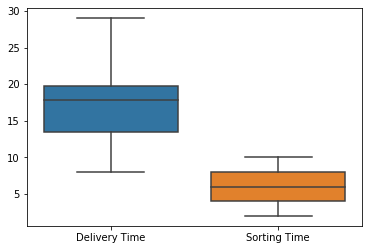

In [7]:
sns.boxplot(data=df)
plt.show()

In [8]:
# the above boxplots says there are no outliers in the dataset

In [9]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


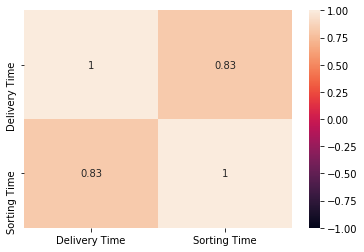

In [10]:
sns.heatmap(data=df.corr(),
            annot=True,
            vmin=-1,
            vmax=1,)
plt.show()

In [11]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [12]:
# from both corr function and heatmap, we can conclude that both are highly correlated to each other.

In [13]:
corr,_ = pearsonr(df['Delivery Time'],df['Sorting Time'])
print('Pearsons correlation : %.3f ' % corr)

Pearsons correlation : 0.826 


Let's separate the X and y values and then we can use the Simple Linear Regression algorithm.

In [14]:
X = df['Sorting Time']
y = df['Delivery Time']

In [15]:
X

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [16]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [17]:
X = sm.add_constant(X)
X

,const,Sorting Time
0,1.0,10
1,1.0,4
2,1.0,6
3,1.0,9
4,1.0,10
5,1.0,6
6,1.0,7
7,1.0,3
8,1.0,10
9,1.0,9


In [18]:
LinearRegression1 = sm.OLS(y,X).fit()
LinearRegression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           3.98e-06
Time:                        13:32:46   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
LinearRegression1.rsquared*100

68.2271474841723

In [20]:
ypred = LinearRegression1.predict(X)
print(ypred)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64


In [21]:
df['ypred'] = ypred

In [22]:
df

,Delivery Time,Sorting Time,ypred
0,21.00,10,23.072933
1,13.50,4,13.178814
2,19.75,6,16.476853
3,24.00,9,21.423913
4,29.00,10,23.072933
5,15.35,6,16.476853
6,19.00,7,18.125873
7,9.50,3,11.529794
8,17.90,10,23.072933
9,18.75,9,21.423913


In [23]:
rmse_df_linear_regression_1 = np.sqrt(mean_squared_error(y,df['ypred']))
rmse_df_linear_regression_1

2.7916503270617654

Now lets do without constants

In [24]:
X = df['Sorting Time']
y = df['Delivery Time']

In [25]:
X

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [26]:
y

0     21.00
1     13.50
2     19.75
3     24.00
4     29.00
5     15.35
6     19.00
7      9.50
8     17.90
9     18.75
10    19.83
11    10.75
12    16.68
13    11.50
14    12.03
15    14.88
16    13.75
17    18.11
18     8.00
19    17.83
20    21.50
Name: Delivery Time, dtype: float64

In [27]:
LinearRegression2 = sm.OLS(y,X).fit()
LinearRegression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          Delivery Time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Thu, 05 Oct 2023   Prob (F-statistic):                    6.12e-15
Time:                        13:32:46   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Sorting Time     2.5652      0.125     20.603      0.000       2.306       2.825
==============================================================================
Omnibus:                        1.504   Durbin-Watson:                   1.305
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                0.508
Skew:                          -0.348   Prob(JB):                        0.776
Kurtosis:                       3.310   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
LinearRegression2.rsquared*100

95.5005401256664

In [29]:
df['ypred'] = LinearRegression2.predict(X)
df

,Delivery Time,Sorting Time,ypred
0,21.00,10,25.652463
1,13.50,4,10.260985
2,19.75,6,15.391478
3,24.00,9,23.087216
4,29.00,10,25.652463
5,15.35,6,15.391478
6,19.00,7,17.956724
7,9.50,3,7.695739
8,17.90,10,25.652463
9,18.75,9,23.087216


In [30]:
rmse_df_linear_regression_2 = np.sqrt(mean_squared_error(y,df['ypred']))
rmse_df_linear_regression_2

3.713386295436734

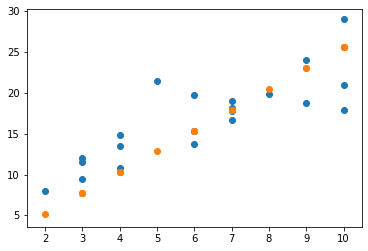

In [31]:
plt.scatter(df['Sorting Time'],df['Delivery Time'])
plt.scatter(df['Sorting Time'],df['ypred'])
plt.show()

##### From the two root mean squared errors we have got two different values from 2 things that is with constant values and without constant values

y = mx + c

RMSE - 2.7916
With Constants to mx, R-Squared Value - 68%

RMSE - 3.7133
Without Constants to mx, R-Squared Value - 95%

So, we can say that value with constants is 2.7 and without constants is 3.7 and among those 2.7 is the less and that means it gives less error so we can use the with constants.